In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import scipy.stats

import util

FOLDER = "/Users/brendan/Projects/trails/data/"

datafiles = [
    "cost-angles|2025-08-01/data.json",
    "cost-angles|2025-08-02/data.json",
]

In [3]:
dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)

ratios: [100.0]
patch recovery: [0.001]
max costs: [1.25 1.5 2.0 3.0 5.0 9.0 17.0 33.0 65.0]
boundary conditions: ['SOLID']
num locations: [10 20]
random walker seeds: 4
random locations seeds: 2
patch recovery logic: ['LINEAR']
settings.searchStrategy : ['KANAI_SUZUKI']
steps: 20000
Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'paths', 'weightedHeadings',
       'avgHeading', 'avgSquareHeading', 'patches',
       'settings.patchImprovement', 'settings.patchRecovery',
       'settings.maxCost', 'settings.boundaryConditions',
       'settings.numLocations', 'settings.randomSeedWalkers',
       'settings.randomSeedLocations', 'settings.recoveryLogic',
       'settings.improvementLogic', 'settings.searchStrategy', 'ratio'],
      dtype='object')


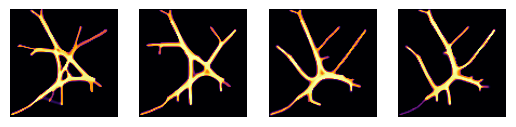

In [4]:
_df = df[
    # (df["settings.maxCost"] == 1.25) &
    (df["steps"] == 10000) &
    (df["settings.randomSeedLocations"] == 1) &
    (df["settings.randomSeedWalkers"] == 4) &
    (df["settings.numLocations"] == 20)]

fig, axs = plt.subplots(1, 4)
for i in range(4):
    axs[i].imshow(np.reshape(_df["patches"].iloc[2 * i + 2], (100, 100)), cmap="inferno")
    axs[i].axis('off')